# Housing Price Prediction - EDA

The dataset is part of a Kaggle competition. <br>
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

In [1502]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Reading the Data

In [1503]:
pd.set_option("max_columns", None)
pd.set_option("max_rows", None)

In [1504]:
#reading the data into a pandas dataframe
raw_data = pd.read_csv('train.csv')
test_raw = pd.read_csv('test.csv')

In [1505]:
print(raw_data.shape)
print(test_raw.shape)

(1460, 81)
(1459, 80)


In [1506]:
raw_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1507]:
raw_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


38 columns imply that out of 81 columns, 38 columns are numerical and the rest are categorical. To perform predictive modeling, categorical variables will have to be dealt differently than numerical variables. 

In [1508]:
raw_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [1509]:
raw_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


## Data Cleaning

In [1510]:
raw_data.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

There is a practical rule of thumb in Data Science, whenever a particular predictor has more than 20% of missing values in your dataset, it is recommended to entirely drop it from ML pipeline (rather then try imputing its missing values). Under such a condition, the imputation would introduce an untrappable noise that the model would learn from, with the performance metrics to be quite poor on the out-of-sample predictions afterwards. <br><br>
We have 1460 samples, so have any column having more than ~300 missing values should be dropped entirely.

In [1511]:
data_cleaned = raw_data.drop(columns = ['PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 'Alley'])
test_cleaned = test_raw.drop(columns = ['PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 'Alley'])

`NaN` values for categorical variable imply that those features aren't available in the house. Replacing it with the mode (most common for categorical) will skew the model. Instead labeling or one hot encoding will be better.

In [1512]:
obj_data_cols = list(data_cleaned.select_dtypes(include=['object']).columns)
obj_data_cols

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [1513]:
obj_data_counts = data_cleaned[obj_data_cols].nunique()
obj_data_counts

MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64

The Encoding techniques below are decided by looking at the description file and understanding whether it is ordinal, nominal,etc. <br>
E.g. Taking a look at the description file for the column - BsmtCond <br>
BsmtCond: Evaluates the general condition of the basement <br>

```
Ex   Excellent 
Gd   Good
TA   Typical - slight dampness allowed
Fa   Fair - dampness or some cracking or settling
Po   Poor - Severe cracking, settling, or wetness
NA   No Basement ```

You can label the Excellent = 5; Good = 4; Typical = 4; Fair = 3; Poor = 1; No Basement = 0<br> 
So, Label Encoding technique used for the column - BsmtCond

In [1514]:
pd.reset_option('^display')

#### MSZoning

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
       
This column has to be one-hot encoded.

In [1515]:
data_cleaned['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [1516]:
MSZoning = pd.get_dummies(data_cleaned[['MSZoning']])
MSZoning_test = pd.get_dummies(test_cleaned[['MSZoning']])

In [1517]:
data_cleaned = pd.concat([data_cleaned, MSZoning], axis=1)
data_cleaned.drop(columns = 'MSZoning', inplace = True)

test_cleaned = pd.concat([test_cleaned, MSZoning_test], axis=1)
test_cleaned.drop(columns = 'MSZoning', inplace = True)

data_cleaned

,Id,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,1,60,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,2,2008,WD,Normal,208500,0,0,0,1,0
1,2,20,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,5,2007,WD,Normal,181500,0,0,0,1,0
2,3,60,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,9,2008,WD,Normal,223500,0,0,0,1,0
3,4,70,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,2,2006,WD,Abnorml,140000,0,0,0,1,0
4,5,60,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,12,2008,WD,Normal,250000,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,8,2007,WD,Normal,175000,0,0,0,1,0
1456,1457,20,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,2,2010,WD,Normal,210000,0,0,0,1,0
1457,1458,70,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,5,2010,WD,Normal,266500,0,0,0,1,0
1458,1459,20,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,4,2010,WD,Normal,142125,0,0,0,1,0


In [1518]:
print(data_cleaned.shape)
print(test_cleaned.shape)

(1460, 80)
(1459, 79)


#### Street

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
Again, this column will be one-hot encoded.

In [1519]:
data_cleaned['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

This column is also going to be dropped because the model will be very skewed towards the 'Paved' street type.

In [1520]:
data_cleaned.drop(columns = 'Street', inplace = True)
test_cleaned.drop(columns = 'Street', inplace = True)

#### LotShape

LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
One-hot Encoding.

In [1521]:
data_cleaned['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [1522]:
LotShape = pd.get_dummies(data_cleaned[['LotShape']])
data_cleaned = pd.concat([data_cleaned, LotShape], axis=1)
data_cleaned.drop(columns = 'LotShape', inplace = True)

LotShape_test = pd.get_dummies(test_cleaned[['LotShape']])
test_cleaned = pd.concat([test_cleaned, LotShape_test], axis=1)
test_cleaned.drop(columns = 'LotShape', inplace = True)

data_cleaned

,Id,MSSubClass,LotFrontage,LotArea,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,1,60,65.0,8450,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,208500,0,0,0,1,0,0,0,0,1
1,2,20,80.0,9600,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,181500,0,0,0,1,0,0,0,0,1
2,3,60,68.0,11250,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,223500,0,0,0,1,0,1,0,0,0
3,4,70,60.0,9550,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,140000,0,0,0,1,0,1,0,0,0
4,5,60,84.0,14260,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,250000,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,175000,0,0,0,1,0,0,0,0,1
1456,1457,20,85.0,13175,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,210000,0,0,0,1,0,0,0,0,1
1457,1458,70,66.0,9042,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,266500,0,0,0,1,0,0,0,0,1
1458,1459,20,68.0,9717,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,142125,0,0,0,1,0,0,0,0,1


In [1523]:
print(data_cleaned.shape)
print(test_cleaned.shape)

(1460, 82)
(1459, 81)


#### LandContour

LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
One-hot Encoding.

In [1524]:
data_cleaned['LandContour'].value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [1525]:
#Dropping column
data_cleaned.drop(columns = 'LandContour', inplace = True)
test_cleaned.drop(columns = 'LandContour', inplace = True)

In [1526]:
'''
LandContour = pd.get_dummies(data_cleaned[['LandContour']])
data_cleaned = pd.concat([data_cleaned, LandContour], axis=1)
data_cleaned.drop(columns = 'LandContour', inplace = True)

LandContour_test = pd.get_dummies(test_cleaned[['LandContour']])
test_cleaned = pd.concat([test_cleaned, LandContour_test], axis=1)
test_cleaned.drop(columns = 'LandContour', inplace = True)

data_cleaned
'''

"\nLandContour = pd.get_dummies(data_cleaned[['LandContour']])\ndata_cleaned = pd.concat([data_cleaned, LandContour], axis=1)\ndata_cleaned.drop(columns = 'LandContour', inplace = True)\n\nLandContour_test = pd.get_dummies(test_cleaned[['LandContour']])\ntest_cleaned = pd.concat([test_cleaned, LandContour_test], axis=1)\ntest_cleaned.drop(columns = 'LandContour', inplace = True)\n\ndata_cleaned\n"

In [1527]:
print(data_cleaned.shape)
print(test_cleaned.shape)

(1460, 81)
(1459, 80)


#### Utilities

Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only
One-hot Encoding.

In [1528]:
data_cleaned['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [1529]:
#Dropping Column
data_cleaned.drop(columns = 'Utilities', inplace=True)
test_cleaned.drop(columns = 'Utilities', inplace=True)

#### LotConfig

LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
       
One-hot Encoding.

In [1530]:
data_cleaned.LotConfig.value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [1531]:
LotConfig = pd.get_dummies(data_cleaned[['LotConfig']])
data_cleaned = pd.concat([data_cleaned, LotConfig], axis=1)
data_cleaned.drop(columns = 'LotConfig', inplace = True)

LotConfig_test = pd.get_dummies(test_cleaned[['LotConfig']])
test_cleaned = pd.concat([test_cleaned, LotConfig_test], axis=1)
test_cleaned.drop(columns = 'LotConfig', inplace = True)

data_cleaned

,Id,MSSubClass,LotFrontage,LotArea,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
0,1,60,65.0,8450,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,0,0,0,0,1,0,0,0,0,1
1,2,20,80.0,9600,Gtl,Veenker,Feedr,Norm,1Fam,1Story,...,0,0,0,0,1,0,0,1,0,0
2,3,60,68.0,11250,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,0,1,0,0,0,0,0,0,0,1
3,4,70,60.0,9550,Gtl,Crawfor,Norm,Norm,1Fam,2Story,...,0,1,0,0,0,1,0,0,0,0
4,5,60,84.0,14260,Gtl,NoRidge,Norm,Norm,1Fam,2Story,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,Gtl,Gilbert,Norm,Norm,1Fam,2Story,...,0,0,0,0,1,0,0,0,0,1
1456,1457,20,85.0,13175,Gtl,NWAmes,Norm,Norm,1Fam,1Story,...,0,0,0,0,1,0,0,0,0,1
1457,1458,70,66.0,9042,Gtl,Crawfor,Norm,Norm,1Fam,2Story,...,0,0,0,0,1,0,0,0,0,1
1458,1459,20,68.0,9717,Gtl,NAmes,Norm,Norm,1Fam,1Story,...,0,0,0,0,1,0,0,0,0,1


In [1532]:
print(data_cleaned.shape)
print(test_cleaned.shape)

(1460, 84)
(1459, 83)


#### LandSlope

LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
One-hot Encoding.

In [1533]:
data_cleaned.LandSlope.value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [1534]:
#Dropping Column
data_cleaned.drop(columns = 'LandSlope', inplace = True)
test_cleaned.drop(columns = 'LandSlope', inplace = True)

#### Neighborhood

Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
One-hot Encoding.

In [1535]:
data_cleaned.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [1536]:
Neighborhood = pd.get_dummies(data_cleaned[['Neighborhood']])
data_cleaned = pd.concat([data_cleaned, Neighborhood], axis=1)
data_cleaned.drop(columns = 'Neighborhood', inplace = True)

Neighborhood_test = pd.get_dummies(test_cleaned[['Neighborhood']])
test_cleaned = pd.concat([test_cleaned, Neighborhood_test], axis=1)
test_cleaned.drop(columns = 'Neighborhood', inplace = True)

data_cleaned

,Id,MSSubClass,LotFrontage,LotArea,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,1,60,65.0,8450,Norm,Norm,1Fam,2Story,7,5,...,0,0,0,0,0,0,0,0,0,0
1,2,20,80.0,9600,Feedr,Norm,1Fam,1Story,6,8,...,0,0,0,0,0,0,0,0,0,1
2,3,60,68.0,11250,Norm,Norm,1Fam,2Story,7,5,...,0,0,0,0,0,0,0,0,0,0
3,4,70,60.0,9550,Norm,Norm,1Fam,2Story,7,5,...,0,0,0,0,0,0,0,0,0,0
4,5,60,84.0,14260,Norm,Norm,1Fam,2Story,8,5,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,Norm,Norm,1Fam,2Story,6,5,...,0,0,0,0,0,0,0,0,0,0
1456,1457,20,85.0,13175,Norm,Norm,1Fam,1Story,6,6,...,0,0,0,0,0,0,0,0,0,0
1457,1458,70,66.0,9042,Norm,Norm,1Fam,2Story,7,9,...,0,0,0,0,0,0,0,0,0,0
1458,1459,20,68.0,9717,Norm,Norm,1Fam,1Story,5,6,...,0,0,0,0,0,0,0,0,0,0


In [1537]:
print(data_cleaned.shape)
print(test_cleaned.shape)

(1460, 107)
(1459, 106)


#### Condition1 and Condition2

Condition1: Proximity to various conditions <br>
Condition2: Proximity to various conditions (if more than one is present)
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
One-hot Encoding.

Combining these columns would make more sense instead creating 9 dummies twice for both the conditions.

In [1538]:
data_cleaned.Condition1.value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [1539]:
data_cleaned.Condition2.value_counts()

Norm      1445
Feedr        6
PosN         2
RRNn         2
Artery       2
RRAe         1
PosA         1
RRAn         1
Name: Condition2, dtype: int64

Note: There are only 8 unique values for Condition2 but 9 for Condition1. The extra value in Condition1 is 'RRne'

In [1540]:
values_test = test_cleaned.Condition2.value_counts().index

In [1541]:
Condition1 = pd.get_dummies(data_cleaned[['Condition1']])
data_cleaned = pd.concat([data_cleaned, Condition1], axis=1)
data_cleaned.drop(columns = 'Condition1', inplace = True)

Condition2 = pd.get_dummies(data_cleaned[['Condition2']])
data_cleaned = pd.concat([data_cleaned, Condition2], axis=1)
data_cleaned.drop(columns = 'Condition2', inplace = True)

Condition1_test = pd.get_dummies(test_cleaned[['Condition1']])
test_cleaned = pd.concat([test_cleaned, Condition1_test], axis=1)
test_cleaned.drop(columns = 'Condition1', inplace = True)

Condition2_test = pd.get_dummies(test_cleaned[['Condition2']])
test_cleaned = pd.concat([test_cleaned, Condition2_test], axis=1)
test_cleaned.drop(columns = 'Condition2', inplace = True)

In [1542]:
values = ['Norm', 'Feedr', 'PosN', 'RRNn', 'Artery', 'RRAe', 'RRAn', 'PosA']
for value in values:
    col1 = 'Condition1_' + value
    col2 = 'Condition2_' + value
    col = 'Condition_' + value
    data_cleaned[col] = data_cleaned[col1] + data_cleaned[col2]
    data_cleaned[col].replace(2, 1, inplace=True)
    data_cleaned.drop(columns = [col1, col2], inplace=True)

for value in values_test:
    col1 = 'Condition1_' + value
    col2 = 'Condition2_' + value
    col = 'Condition_' + value
    test_cleaned[col] = test_cleaned[col1] + test_cleaned[col2]
    test_cleaned[col].replace(2, 1, inplace=True)
    test_cleaned.drop(columns = [col1, col2], inplace=True)


In [1543]:
data_cleaned.rename(columns = {'Condition1_RRNe': 'Condition_RRNe'}, inplace = True)

test_cleaned.rename(columns = {'Condition1_RRAe' : 'Conditoin_RRAe', 
                               'Condition1_RRAn' : 'Condition_RRAn', 
                               'Condition1_RRNe' : 'Condition_RRNe', 
                               'Condition1_RRNn ' : 'Condition_RRNn'}, inplace = True)
data_cleaned

,Id,MSSubClass,LotFrontage,LotArea,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,Neighborhood_Veenker,Condition_RRNe,Condition_Norm,Condition_Feedr,Condition_PosN,Condition_RRNn,Condition_Artery,Condition_RRAe,Condition_RRAn,Condition_PosA
0,1,60,65.0,8450,1Fam,2Story,7,5,2003,2003,...,0,0,1,0,0,0,0,0,0,0
1,2,20,80.0,9600,1Fam,1Story,6,8,1976,1976,...,1,0,1,1,0,0,0,0,0,0
2,3,60,68.0,11250,1Fam,2Story,7,5,2001,2002,...,0,0,1,0,0,0,0,0,0,0
3,4,70,60.0,9550,1Fam,2Story,7,5,1915,1970,...,0,0,1,0,0,0,0,0,0,0
4,5,60,84.0,14260,1Fam,2Story,8,5,2000,2000,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,1Fam,2Story,6,5,1999,2000,...,0,0,1,0,0,0,0,0,0,0
1456,1457,20,85.0,13175,1Fam,1Story,6,6,1978,1988,...,0,0,1,0,0,0,0,0,0,0
1457,1458,70,66.0,9042,1Fam,2Story,7,9,1941,2006,...,0,0,1,0,0,0,0,0,0,0
1458,1459,20,68.0,9717,1Fam,1Story,5,6,1950,1996,...,0,0,1,0,0,0,0,0,0,0


In [1544]:
print(data_cleaned.shape)
print(test_cleaned.shape)

(1460, 114)
(1459, 113)


#### BldgType

BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
One-hot Encoding.

In [1545]:
data_cleaned['BldgType'].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [1546]:
BldgType = pd.get_dummies(data_cleaned[['BldgType']])
data_cleaned = pd.concat([data_cleaned, BldgType], axis=1)
data_cleaned.drop(columns = 'BldgType', inplace = True)

BldgType_test = pd.get_dummies(test_cleaned[['BldgType']])
test_cleaned = pd.concat([test_cleaned, BldgType_test], axis=1)
test_cleaned.drop(columns = 'BldgType', inplace = True)

data_cleaned

,Id,MSSubClass,LotFrontage,LotArea,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,...,Condition_RRNn,Condition_Artery,Condition_RRAe,Condition_RRAn,Condition_PosA,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE
0,1,60,65.0,8450,2Story,7,5,2003,2003,Gable,...,0,0,0,0,0,1,0,0,0,0
1,2,20,80.0,9600,1Story,6,8,1976,1976,Gable,...,0,0,0,0,0,1,0,0,0,0
2,3,60,68.0,11250,2Story,7,5,2001,2002,Gable,...,0,0,0,0,0,1,0,0,0,0
3,4,70,60.0,9550,2Story,7,5,1915,1970,Gable,...,0,0,0,0,0,1,0,0,0,0
4,5,60,84.0,14260,2Story,8,5,2000,2000,Gable,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,2Story,6,5,1999,2000,Gable,...,0,0,0,0,0,1,0,0,0,0
1456,1457,20,85.0,13175,1Story,6,6,1978,1988,Gable,...,0,0,0,0,0,1,0,0,0,0
1457,1458,70,66.0,9042,2Story,7,9,1941,2006,Gable,...,0,0,0,0,0,1,0,0,0,0
1458,1459,20,68.0,9717,1Story,5,6,1950,1996,Hip,...,0,0,0,0,0,1,0,0,0,0


In [1547]:
print(data_cleaned.shape)
print(test_cleaned.shape)

(1460, 118)
(1459, 117)


#### HouseStyle

HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
One-hot Encoding.

In [1548]:
data_cleaned.HouseStyle.value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [1549]:
HouseStyle = pd.get_dummies(data_cleaned[['HouseStyle']])
data_cleaned = pd.concat([data_cleaned, HouseStyle], axis=1)
data_cleaned.drop(columns = 'HouseStyle', inplace = True)

HouseStyle_test = pd.get_dummies(test_cleaned[['HouseStyle']])
test_cleaned = pd.concat([test_cleaned, HouseStyle_test], axis=1)
test_cleaned.drop(columns = 'HouseStyle', inplace = True)

data_cleaned

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,...,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,1,60,65.0,8450,7,5,2003,2003,Gable,CompShg,...,0,0,0,0,0,0,0,1,0,0
1,2,20,80.0,9600,6,8,1976,1976,Gable,CompShg,...,0,0,0,0,1,0,0,0,0,0
2,3,60,68.0,11250,7,5,2001,2002,Gable,CompShg,...,0,0,0,0,0,0,0,1,0,0
3,4,70,60.0,9550,7,5,1915,1970,Gable,CompShg,...,0,0,0,0,0,0,0,1,0,0
4,5,60,84.0,14260,8,5,2000,2000,Gable,CompShg,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,Gable,CompShg,...,0,0,0,0,0,0,0,1,0,0
1456,1457,20,85.0,13175,6,6,1978,1988,Gable,CompShg,...,0,0,0,0,1,0,0,0,0,0
1457,1458,70,66.0,9042,7,9,1941,2006,Gable,CompShg,...,0,0,0,0,0,0,0,1,0,0
1458,1459,20,68.0,9717,5,6,1950,1996,Hip,CompShg,...,0,0,0,0,1,0,0,0,0,0


In [1550]:
print(data_cleaned.shape)
print(test_cleaned.shape)

(1460, 125)
(1459, 123)


In [1551]:
test_cleaned['HouseStyle_2.5Fin'] = [0] * 1459
test_cleaned

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,...,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_2.5Fin
0,1461,20,80.0,11622,5,6,1961,1961,Gable,CompShg,...,0,0,0,0,1,0,0,0,0,0
1,1462,20,81.0,14267,6,6,1958,1958,Hip,CompShg,...,0,0,0,0,1,0,0,0,0,0
2,1463,60,74.0,13830,5,5,1997,1998,Gable,CompShg,...,0,0,0,0,0,0,1,0,0,0
3,1464,60,78.0,9978,6,6,1998,1998,Gable,CompShg,...,0,0,0,0,0,0,1,0,0,0
4,1465,120,43.0,5005,8,5,1992,1992,Gable,CompShg,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,Gable,CompShg,...,1,0,0,0,0,0,1,0,0,0
1455,2916,160,21.0,1894,4,5,1970,1970,Gable,CompShg,...,0,1,0,0,0,0,1,0,0,0
1456,2917,20,160.0,20000,5,7,1960,1996,Gable,CompShg,...,0,0,0,0,1,0,0,0,0,0
1457,2918,85,62.0,10441,5,5,1992,1992,Gable,CompShg,...,0,0,0,0,0,0,0,1,0,0


In [1552]:
print(data_cleaned.shape)
print(test_cleaned.shape)

(1460, 125)
(1459, 124)


#### RoofStyle

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
One-hot Encoding.

In [1553]:
data_cleaned.RoofStyle.value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [1554]:
RoofStyle = pd.get_dummies(data_cleaned[['RoofStyle']])
data_cleaned = pd.concat([data_cleaned, RoofStyle], axis=1)
data_cleaned.drop(columns = 'RoofStyle', inplace = True)

RoofStyle_test = pd.get_dummies(test_cleaned[['RoofStyle']])
test_cleaned = pd.concat([test_cleaned, RoofStyle_test], axis=1)
test_cleaned.drop(columns = 'RoofStyle', inplace = True)

data_cleaned

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,...,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,1,60,65.0,8450,7,5,2003,2003,CompShg,VinylSd,...,0,1,0,0,0,1,0,0,0,0
1,2,20,80.0,9600,6,8,1976,1976,CompShg,MetalSd,...,0,0,0,0,0,1,0,0,0,0
2,3,60,68.0,11250,7,5,2001,2002,CompShg,VinylSd,...,0,1,0,0,0,1,0,0,0,0
3,4,70,60.0,9550,7,5,1915,1970,CompShg,Wd Sdng,...,0,1,0,0,0,1,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,CompShg,VinylSd,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,CompShg,VinylSd,...,0,1,0,0,0,1,0,0,0,0
1456,1457,20,85.0,13175,6,6,1978,1988,CompShg,Plywood,...,0,0,0,0,0,1,0,0,0,0
1457,1458,70,66.0,9042,7,9,1941,2006,CompShg,CemntBd,...,0,1,0,0,0,1,0,0,0,0
1458,1459,20,68.0,9717,5,6,1950,1996,CompShg,MetalSd,...,0,0,0,0,0,0,0,1,0,0


In [1555]:
print(data_cleaned.shape)
print(test_cleaned.shape)

(1460, 130)
(1459, 129)


#### RoofMatl

RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
One-hot Encoding.

In [1556]:
data_cleaned.RoofMatl.value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Membran       1
Metal         1
ClyTile       1
Roll          1
Name: RoofMatl, dtype: int64

In [1557]:
#Dropping column
data_cleaned.drop(columns = 'RoofMatl', inplace = True)
test_cleaned.drop(columns = 'RoofMatl', inplace = True)

#### Exterior1st and Exterior2nd

Exterior1st: Exterior covering on house <br>
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
One-hot Encoding.

Doing the same as Condition1 and Condition2.

In [1558]:
data_cleaned.Exterior1st.value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

In [1559]:
data_cleaned.Exterior2nd.value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

Note: Exterior2nd has one extra value - 'Other'. <br>
Also, that some of the same values have different names in the 2 columns. Eg. 'Brick Common' is 'BrkComm' in 1st and 'Brk Cmn' in the 2nd column.

In [1560]:
sorted(test_cleaned.Exterior1st.value_counts().index)

['AsbShng',
 'AsphShn',
 'BrkComm',
 'BrkFace',
 'CBlock',
 'CemntBd',
 'HdBoard',
 'MetalSd',
 'Plywood',
 'Stucco',
 'VinylSd',
 'Wd Sdng',
 'WdShing']

In [1561]:
sorted(test_cleaned.Exterior2nd.value_counts().index)

['AsbShng',
 'AsphShn',
 'Brk Cmn',
 'BrkFace',
 'CBlock',
 'CmentBd',
 'HdBoard',
 'ImStucc',
 'MetalSd',
 'Plywood',
 'Stone',
 'Stucco',
 'VinylSd',
 'Wd Sdng',
 'Wd Shng']

In [1562]:
data_cleaned.Exterior2nd.replace('CmentBd', 'CemntBd', inplace=True)
data_cleaned.Exterior2nd.replace('Brk Cmn', 'BrkComm', inplace=True)
data_cleaned.Exterior2nd.replace('Wd Shng', 'WdShing', inplace=True)

test_cleaned.Exterior2nd.replace('CmentBd', 'CemntBd', inplace=True)
test_cleaned.Exterior2nd.replace('Brk Cmn', 'BrkComm', inplace=True)
test_cleaned.Exterior2nd.replace('Wd Shng', 'WdShing', inplace=True)

In [1563]:
values = list(data_cleaned.Exterior1st.value_counts().index)
values_test = list(test_cleaned.Exterior1st.value_counts().index)

In [1564]:
Exterior1st = pd.get_dummies(data_cleaned[['Exterior1st']])
data_cleaned = pd.concat([data_cleaned, Exterior1st], axis=1)
data_cleaned.drop(columns = 'Exterior1st', inplace = True)

Exterior2nd = pd.get_dummies(data_cleaned[['Exterior2nd']])
data_cleaned = pd.concat([data_cleaned, Exterior2nd], axis=1)
data_cleaned.drop(columns = 'Exterior2nd', inplace = True)

Exterior1st_test = pd.get_dummies(test_cleaned[['Exterior1st']])
test_cleaned = pd.concat([test_cleaned, Exterior1st_test], axis=1)
test_cleaned.drop(columns = 'Exterior1st', inplace = True)

Exterior2nd_test = pd.get_dummies(test_cleaned[['Exterior2nd']])
test_cleaned = pd.concat([test_cleaned, Exterior2nd_test], axis=1)
test_cleaned.drop(columns = 'Exterior2nd', inplace = True)

In [1565]:
for value in values:
    col1 = 'Exterior1st_' + value
    col2 = 'Exterior2nd_' + value
    col = 'Exterior_' + value
    data_cleaned[col] = data_cleaned[col1] + data_cleaned[col2]
    data_cleaned[col].replace(2, 1, inplace=True)
    data_cleaned.drop(columns = [col1, col2], inplace=True)

for value in values_test:
    col1 = 'Exterior1st_' + value
    col2 = 'Exterior2nd_' + value
    col = 'Exterior_' + value
    test_cleaned[col] = test_cleaned[col1] + test_cleaned[col2]
    test_cleaned[col].replace(2, 1, inplace=True)
    test_cleaned.drop(columns = [col1, col2], inplace=True)

data_cleaned.rename(columns = {'Exterior2nd_Other':'Exterior_Other'}, inplace=True)
test_cleaned.rename(columns = {'Exterior2nd_Stone':'Exterior_Stone',
                               'Exterior2nd_ImStucc':'Exterior_ImStucc'}, inplace = True)
data_cleaned

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,...,Exterior_CemntBd,Exterior_BrkFace,Exterior_WdShing,Exterior_Stucco,Exterior_AsbShng,Exterior_Stone,Exterior_BrkComm,Exterior_AsphShn,Exterior_ImStucc,Exterior_CBlock
0,1,60,65.0,8450,7,5,2003,2003,BrkFace,196.0,...,0,0,0,0,0,0,0,0,0,0
1,2,20,80.0,9600,6,8,1976,1976,None,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,60,68.0,11250,7,5,2001,2002,BrkFace,162.0,...,0,0,0,0,0,0,0,0,0,0
3,4,70,60.0,9550,7,5,1915,1970,None,0.0,...,0,0,1,0,0,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,BrkFace,350.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,None,0.0,...,0,0,0,0,0,0,0,0,0,0
1456,1457,20,85.0,13175,6,6,1978,1988,Stone,119.0,...,0,0,0,0,0,0,0,0,0,0
1457,1458,70,66.0,9042,7,9,1941,2006,None,0.0,...,1,0,0,0,0,0,0,0,0,0
1458,1459,20,68.0,9717,5,6,1950,1996,None,0.0,...,0,0,0,0,0,0,0,0,0,0


In [1566]:
print(data_cleaned.shape)
print(test_cleaned.shape)

(1460, 143)
(1459, 141)


In [1567]:
test_cleaned['Exterior_Other'] = [0] * 1459
test_cleaned

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,...,Exterior_Plywood,Exterior_CemntBd,Exterior_BrkFace,Exterior_WdShing,Exterior_AsbShng,Exterior_Stucco,Exterior_BrkComm,Exterior_AsphShn,Exterior_CBlock,Exterior_Other
0,1461,20,80.0,11622,5,6,1961,1961,None,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1462,20,81.0,14267,6,6,1958,1958,BrkFace,108.0,...,0,0,0,0,0,0,0,0,0,0
2,1463,60,74.0,13830,5,5,1997,1998,None,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1464,60,78.0,9978,6,6,1998,1998,BrkFace,20.0,...,0,0,0,0,0,0,0,0,0,0
4,1465,120,43.0,5005,8,5,1992,1992,None,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,None,0.0,...,0,1,0,0,0,0,0,0,0,0
1455,2916,160,21.0,1894,4,5,1970,1970,None,0.0,...,0,1,0,0,0,0,0,0,0,0
1456,2917,20,160.0,20000,5,7,1960,1996,None,0.0,...,0,0,0,0,0,0,0,0,0,0
1457,2918,85,62.0,10441,5,5,1992,1992,None,0.0,...,0,0,0,1,0,0,0,0,0,0


In [1568]:
print(data_cleaned.shape)
print(test_cleaned.shape)

(1460, 143)
(1459, 142)


#### MasVnrType

MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	  None
       Stone	Stone
One-hot Encoding.

In [1569]:
data_cleaned.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [1570]:
MasVnrType = pd.get_dummies(data_cleaned[['MasVnrType']])
data_cleaned = pd.concat([data_cleaned, MasVnrType], axis=1)
data_cleaned.drop(columns = 'MasVnrType', inplace = True)

MasVnrType_test = pd.get_dummies(test_cleaned[['MasVnrType']])
test_cleaned = pd.concat([test_cleaned, MasVnrType_test], axis=1)
test_cleaned.drop(columns = 'MasVnrType', inplace = True)

data_cleaned

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,Exterior_AsbShng,Exterior_Stone,Exterior_BrkComm,Exterior_AsphShn,Exterior_ImStucc,Exterior_CBlock,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
0,1,60,65.0,8450,7,5,2003,2003,196.0,Gd,...,0,0,0,0,0,0,0,1,0,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,TA,...,0,0,0,0,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,Gd,...,0,0,0,0,0,0,0,1,0,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,TA,...,0,0,0,0,0,0,0,0,1,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,Gd,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,TA,...,0,0,0,0,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,TA,...,0,0,0,0,0,0,0,0,0,1
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,Ex,...,0,0,0,0,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,TA,...,0,0,0,0,0,0,0,0,1,0


In [1571]:
print(data_cleaned.shape)
print(test_cleaned.shape)

(1460, 146)
(1459, 145)


#### ExterQual

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
This column should be labeled.

We can label them as following: <br>

        Ex - 5
        Gd - 4
        TA - 3
        Fa - 2
        Po - 1
    

In [1572]:
data_cleaned.ExterQual.value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [1573]:
def label(rate):
    if rate == 'Ex':
        return 5
    elif rate == 'Gd':
        return 4
    elif rate == 'TA':
        return 3
    elif rate == 'Fa':
        return 2
    elif rate == 'Po':
        return 1
    else: # Columns later will be needing these
        return 0

In [1574]:
data_cleaned['ExterQual'] = data_cleaned.ExterQual.apply(lambda x : label(x))

test_cleaned['ExterQual'] = test_cleaned.ExterQual.apply(lambda x : label(x))

data_cleaned['ExterQual']

0       4
1       3
2       4
3       3
4       4
       ..
1455    3
1456    3
1457    5
1458    3
1459    4
Name: ExterQual, Length: 1460, dtype: int64

In [1575]:
print(data_cleaned.shape)
print(test_cleaned.shape)

(1460, 146)
(1459, 145)


#### ExterCond

ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Labeling.

It has to labelled the same as 'ExterQual'.

In [1576]:
data_cleaned.ExterCond.value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [1577]:
data_cleaned['ExterCond'] = data_cleaned.ExterCond.apply(lambda x : label(x))
test_cleaned['ExterCond'] = test_cleaned.ExterCond.apply(lambda x : label(x))
data_cleaned['ExterCond']

0       3
1       3
2       3
3       3
4       3
       ..
1455    3
1456    3
1457    4
1458    3
1459    3
Name: ExterCond, Length: 1460, dtype: int64

#### Foundation

Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
One-hot Encoding.

In [1578]:
data_cleaned.Foundation.value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [1579]:
Foundation = pd.get_dummies(data_cleaned[['Foundation']])
data_cleaned = pd.concat([data_cleaned, Foundation], axis=1)
data_cleaned.drop(columns = 'Foundation', inplace = True)

Foundation_test = pd.get_dummies(test_cleaned[['Foundation']])
test_cleaned = pd.concat([test_cleaned, Foundation_test], axis=1)
test_cleaned.drop(columns = 'Foundation', inplace = True)

data_cleaned

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,1,60,65.0,8450,7,5,2003,2003,196.0,4,...,0,1,0,0,0,0,1,0,0,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,3,...,0,0,1,0,0,1,0,0,0,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,4,...,0,1,0,0,0,0,1,0,0,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,3,...,0,0,1,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,4,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,3,...,0,0,1,0,0,0,1,0,0,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,3,...,0,0,0,1,0,1,0,0,0,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,5,...,0,0,1,0,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,3,...,0,0,1,0,0,1,0,0,0,0


In [1580]:
print(data_cleaned.shape)
print(test_cleaned.shape)

(1460, 151)
(1459, 150)


#### BsmtQual

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
Labeling.

Note: As defined in the label function, 'NA' will be assigned '0', which seems fitting.

In [1581]:
data_cleaned.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [1582]:
data_cleaned['BsmtQual'] = data_cleaned.BsmtQual.apply(lambda x : label(x))
test_cleaned['BsmtQual'] = test_cleaned.BsmtQual.apply(lambda x : label(x))
data_cleaned.BsmtQual

0       4
1       4
2       4
3       3
4       4
       ..
1455    4
1456    4
1457    3
1458    3
1459    3
Name: BsmtQual, Length: 1460, dtype: int64

#### BsmtCond

BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
Labeling.

In [1583]:
data_cleaned.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [1584]:
#Dropping Column
data_cleaned.drop(columns = ['BsmtCond'], inplace=True)
test_cleaned.drop(columns = ['BsmtCond'], inplace=True)

In [1585]:
'''
data_cleaned['BsmtCond']  = data_cleaned.BsmtCond.apply(lambda x : label(x))
test_cleaned['BsmtCond']  = test_cleaned.BsmtCond.apply(lambda x : label(x))
data_cleaned.BsmtCond
'''

"\ndata_cleaned['BsmtCond']  = data_cleaned.BsmtCond.apply(lambda x : label(x))\ntest_cleaned['BsmtCond']  = test_cleaned.BsmtCond.apply(lambda x : label(x))\ndata_cleaned.BsmtCond\n"

#### BsmtExposure

BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
Labeling.

In [1586]:
data_cleaned.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [1587]:
def label_BsmtExp(rate):
    if rate == 'Gd':
        return 4
    elif rate == 'Av':
        return 3
    elif rate == 'Mn':
        return 2
    elif rate == 'No':
        return 1
    else: 
        return 0

In [1588]:
data_cleaned['BsmtExposure'] = data_cleaned.BsmtExposure.apply(lambda x : label_BsmtExp(x))
test_cleaned['BsmtExposure'] = test_cleaned.BsmtExposure.apply(lambda x : label_BsmtExp(x))
data_cleaned['BsmtExposure']

0       1
1       4
2       2
3       1
4       3
       ..
1455    1
1456    1
1457    1
1458    2
1459    1
Name: BsmtExposure, Length: 1460, dtype: int64

#### BsmtFinType1 and BsmtFinType2

BsmtFinType1: Rating of basement finished area
BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
Labeling.

In [1589]:
data_cleaned.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [1590]:
data_cleaned.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [1591]:
def label_BsmtFin(rate):
    if rate == 'GLQ':
        return 6
    elif rate == 'ALQ':
        return 5
    elif rate == 'BLQ':
        return 4
    elif rate == 'Rec':
        return 3
    elif rate == 'LwQ':
        return 2
    elif rate == 'Unf':
        return 1
    else:
        return 0

In [1592]:
data_cleaned['BsmtFinType1'] = data_cleaned.BsmtFinType1.apply(lambda x : label_BsmtFin(x))
test_cleaned['BsmtFinType1'] = test_cleaned.BsmtFinType1.apply(lambda x : label_BsmtFin(x))

data_cleaned['BsmtFinType2'] = data_cleaned.BsmtFinType2.apply(lambda x : label_BsmtFin(x))
test_cleaned['BsmtFinType2'] = test_cleaned.BsmtFinType2.apply(lambda x : label_BsmtFin(x))

In [1593]:
data_cleaned['BsmtFinType'] = (data_cleaned['BsmtFinType1'][data_cleaned['BsmtFinType1']>0] + 
                               data_cleaned['BsmtFinType2'][data_cleaned['BsmtFinType2']>0]) / 2

test_cleaned['BsmtFinType'] = (test_cleaned['BsmtFinType1'][test_cleaned['BsmtFinType1']>0] + 
                               test_cleaned['BsmtFinType2'][test_cleaned['BsmtFinType2']>0]) / 2

In [1594]:
data_cleaned.BsmtFinType.isna().sum()

38

In [1595]:
data_cleaned['BsmtFinType'].fillna(data_cleaned['BsmtFinType1'] + data_cleaned['BsmtFinType2'], inplace = True)
test_cleaned['BsmtFinType'].fillna(test_cleaned['BsmtFinType1'] + test_cleaned['BsmtFinType2'], inplace = True)
data_cleaned.BsmtFinType.isna().sum()

0

In [1596]:
data_cleaned.drop(columns = ['BsmtFinType1', 'BsmtFinType2'], inplace = True)
test_cleaned.drop(columns = ['BsmtFinType1', 'BsmtFinType2'], inplace = True)

#### Heating

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
One-hot Encoding.

In [1597]:
data_cleaned.Heating.value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [1598]:
#Dropping column
data_cleaned.drop(columns = ['Heating'], inplace = True)
test_cleaned.drop(columns = ['Heating'], inplace = True)

In [1599]:
print(data_cleaned.shape)
print(test_cleaned.shape)

(1460, 148)
(1459, 147)


#### HeatingQC

HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Labeling.

In [1600]:
data_cleaned.HeatingQC.value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [1601]:
data_cleaned['HeatingQC'] = data_cleaned.HeatingQC.apply(lambda x : label(x))
test_cleaned['HeatingQC'] = test_cleaned.HeatingQC.apply(lambda x : label(x))
data_cleaned.HeatingQC

0       5
1       5
2       5
3       4
4       5
       ..
1455    5
1456    3
1457    5
1458    4
1459    4
Name: HeatingQC, Length: 1460, dtype: int64

#### CentralAir

CentralAir: Central air conditioning

       N	No
       Y	Yes
Labeling.

In [1602]:
data_cleaned.CentralAir.value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [1603]:
#Dropping Column
data_cleaned.drop(columns = ['CentralAir'], inplace=True)
test_cleaned.drop(columns = ['CentralAir'], inplace=True)

In [1604]:
def Y_N(x):
    if x == 'Y':
        return 1
    elif x == 'N':
        return 0
    elif x == 'P':
        return 0.5

In [1605]:
'''
data_cleaned['CentralAir'] = data_cleaned.CentralAir.apply(lambda x : Y_N(x))
test_cleaned['CentralAir'] = test_cleaned.CentralAir.apply(lambda x : Y_N(x))
'''

"\ndata_cleaned['CentralAir'] = data_cleaned.CentralAir.apply(lambda x : Y_N(x))\ntest_cleaned['CentralAir'] = test_cleaned.CentralAir.apply(lambda x : Y_N(x))\n"

#### Electrical

Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
One-hot Encoding.

In [1606]:
data_cleaned.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [1607]:
#Dropping Column
data_cleaned.drop(columns = ['Electrical'], inplace=True)
test_cleaned.drop(columns = ['Electrical'], inplace=True)

In [1608]:
'''
Electrical = pd.get_dummies(data_cleaned[['Electrical']])
data_cleaned = pd.concat([data_cleaned, Electrical], axis=1)
data_cleaned.drop(columns = 'Electrical', inplace = True)

Electrical_test = pd.get_dummies(test_cleaned[['Electrical']])
test_cleaned = pd.concat([test_cleaned, Electrical_test], axis=1)
test_cleaned.drop(columns = 'Electrical', inplace = True)

data_cleaned
'''

"\nElectrical = pd.get_dummies(data_cleaned[['Electrical']])\ndata_cleaned = pd.concat([data_cleaned, Electrical], axis=1)\ndata_cleaned.drop(columns = 'Electrical', inplace = True)\n\nElectrical_test = pd.get_dummies(test_cleaned[['Electrical']])\ntest_cleaned = pd.concat([test_cleaned, Electrical_test], axis=1)\ntest_cleaned.drop(columns = 'Electrical', inplace = True)\n\ndata_cleaned\n"

In [1609]:
print(data_cleaned.shape)
print(test_cleaned.shape)

(1460, 146)
(1459, 145)


In [1610]:
#test_cleaned['Electrical_Mix'] = [0] * 1459

In [1611]:
print(data_cleaned.shape)
print(test_cleaned.shape)

(1460, 146)
(1459, 145)


#### KitchenQual

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
Labeling.

In [1612]:
data_cleaned.KitchenQual.value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [1613]:
data_cleaned['KitchenQual'] = data_cleaned.KitchenQual.apply(lambda x : label(x))
test_cleaned['KitchenQual'] = test_cleaned.KitchenQual.apply(lambda x : label(x))

#### Functional

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Labeling.

In [1614]:
data_cleaned.Functional.value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [1615]:
#Dropping Column
data_cleaned.drop(columns = ['Functional'], inplace=True)
test_cleaned.drop(columns = ['Functional'], inplace=True)

In [1616]:
def label_Func(x):
    if x == 'Typ':
        return 7
    elif x == 'Min1':
        return 6
    elif x == 'Min2':
        return 5
    elif x == 'Mod':
        return 4
    elif x == 'Maj1':
        return 3
    elif x == 'Maj2':
        return 2
    elif x == 'Sev':
        return 1
    else:
        return 0

In [1617]:
'''
data_cleaned['Functional'] = data_cleaned.Functional.apply(lambda x : label_Func(x))
test_cleaned['Functional'] = test_cleaned.Functional.apply(lambda x : label_Func(x))
'''

"\ndata_cleaned['Functional'] = data_cleaned.Functional.apply(lambda x : label_Func(x))\ntest_cleaned['Functional'] = test_cleaned.Functional.apply(lambda x : label_Func(x))\n"

#### GarageType

GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
       
One-hot Encoding.

In [1618]:
data_cleaned.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [1619]:
GarageType = pd.get_dummies(data_cleaned[['GarageType']])
data_cleaned = pd.concat([data_cleaned, GarageType], axis=1)
data_cleaned.drop(columns = 'GarageType', inplace = True)

GarageType_test = pd.get_dummies(test_cleaned[['GarageType']])
test_cleaned = pd.concat([test_cleaned, GarageType_test], axis=1)
test_cleaned.drop(columns = 'GarageType', inplace = True)

data_cleaned

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtFinType,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd
0,1,60,65.0,8450,7,5,2003,2003,196.0,4,...,0,0,0,3.5,0,1,0,0,0,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,3,...,0,0,0,3.0,0,1,0,0,0,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,4,...,0,0,0,3.5,0,1,0,0,0,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,3,...,0,0,0,3.0,0,0,0,0,0,1
4,5,60,84.0,14260,8,5,2000,2000,350.0,4,...,0,0,0,3.5,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,3,...,0,0,0,1.0,0,1,0,0,0,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,3,...,0,0,0,4.0,0,1,0,0,0,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,5,...,0,1,0,3.5,0,1,0,0,0,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,3,...,0,0,0,4.5,0,1,0,0,0,0


In [1620]:
print(data_cleaned.shape)
print(test_cleaned.shape)

(1460, 150)
(1459, 149)


#### GarageFinish

GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

Labeling.

In [1621]:
data_cleaned.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [1622]:
def label_Gar(x):
    if x == 'Fin':
        return 3
    elif x == 'RFn':
        return 2
    elif x == 'Unf':
        return 1
    else: 
        return 0

In [1623]:
data_cleaned['GarageFinish'] = data_cleaned.GarageFinish.apply(lambda x : label_Gar(x))
test_cleaned['GarageFinish'] = test_cleaned.GarageFinish.apply(lambda x : label_Gar(x))

#### GarageQual

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
Labeling.

In [1624]:
data_cleaned.GarageQual.value_counts()

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [1625]:
#Dropping Column
data_cleaned.drop(columns = ['GarageQual'], inplace=True)
test_cleaned.drop(columns = ['GarageQual'], inplace=True)

In [1626]:
'''
data_cleaned['GarageQual'] = data_cleaned.GarageQual.apply(lambda x : label(x))
test_cleaned['GarageQual'] = test_cleaned.GarageQual.apply(lambda x : label(x)) '''

"\ndata_cleaned['GarageQual'] = data_cleaned.GarageQual.apply(lambda x : label(x))\ntest_cleaned['GarageQual'] = test_cleaned.GarageQual.apply(lambda x : label(x)) "

#### GarageCond

GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
Labeling.

In [1627]:
data_cleaned.GarageCond.value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [1628]:
#Dropping Column
data_cleaned.drop(columns = ['GarageCond'], inplace=True)
test_cleaned.drop(columns = ['GarageCond'], inplace=True)

In [1629]:
'''
data_cleaned['GarageCond'] = data_cleaned.GarageCond.apply(lambda x : label(x))
test_cleaned['GarageCond'] = test_cleaned.GarageCond.apply(lambda x : label(x)) '''

"\ndata_cleaned['GarageCond'] = data_cleaned.GarageCond.apply(lambda x : label(x))\ntest_cleaned['GarageCond'] = test_cleaned.GarageCond.apply(lambda x : label(x)) "

#### PavedDrive

PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
Labeling.

In [1630]:
data_cleaned.PavedDrive.value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

In [1631]:
#Dropping Column
data_cleaned.drop(columns = ['PavedDrive'], inplace=True)
test_cleaned.drop(columns = ['PavedDrive'], inplace=True)

In [1632]:
'''
data_cleaned['PavedDrive'] = data_cleaned.PavedDrive.apply(lambda x : Y_N(x))
test_cleaned['PavedDrive'] = test_cleaned.PavedDrive.apply(lambda x : Y_N(x)) '''

"\ndata_cleaned['PavedDrive'] = data_cleaned.PavedDrive.apply(lambda x : Y_N(x))\ntest_cleaned['PavedDrive'] = test_cleaned.PavedDrive.apply(lambda x : Y_N(x)) "

#### SaleType

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

One-hot Encoding.

In [1633]:
data_cleaned.SaleType.value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [1634]:
SaleType = pd.get_dummies(data_cleaned[['SaleType']])
data_cleaned = pd.concat([data_cleaned, SaleType], axis=1)
data_cleaned.drop(columns = 'SaleType', inplace = True)

SaleType_test = pd.get_dummies(test_cleaned[['SaleType']])
test_cleaned = pd.concat([test_cleaned, SaleType_test], axis=1)
test_cleaned.drop(columns = 'SaleType', inplace = True)

data_cleaned

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,GarageType_Detchd,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,1,60,65.0,8450,7,5,2003,2003,196.0,4,...,0,0,0,0,0,0,0,0,0,1
1,2,20,80.0,9600,6,8,1976,1976,0.0,3,...,0,0,0,0,0,0,0,0,0,1
2,3,60,68.0,11250,7,5,2001,2002,162.0,4,...,0,0,0,0,0,0,0,0,0,1
3,4,70,60.0,9550,7,5,1915,1970,0.0,3,...,1,0,0,0,0,0,0,0,0,1
4,5,60,84.0,14260,8,5,2000,2000,350.0,4,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,3,...,0,0,0,0,0,0,0,0,0,1
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,3,...,0,0,0,0,0,0,0,0,0,1
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,5,...,0,0,0,0,0,0,0,0,0,1
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,3,...,0,0,0,0,0,0,0,0,0,1


In [1635]:
print(data_cleaned.shape)
print(test_cleaned.shape)

(1460, 155)
(1459, 154)


#### SaleCondition

SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

One-hot Encoding.

In [1636]:
data_cleaned.SaleCondition.value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [1637]:
SaleCondition = pd.get_dummies(data_cleaned[['SaleCondition']])
data_cleaned = pd.concat([data_cleaned, SaleCondition], axis=1)
data_cleaned.drop(columns = 'SaleCondition', inplace = True)

SaleCondition_test = pd.get_dummies(test_cleaned[['SaleCondition']])
test_cleaned = pd.concat([test_cleaned, SaleCondition_test], axis=1)
test_cleaned.drop(columns = 'SaleCondition', inplace = True)

data_cleaned

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,4,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,3,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,4,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,3,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,4,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,3,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,3,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,5,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,3,...,0,0,0,1,0,0,0,0,1,0


In [1638]:
print(data_cleaned.shape)
print(test_cleaned.shape)

(1460, 160)
(1459, 159)


In [1639]:
list(data_cleaned.columns)

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborh

In [1640]:
data_cleaned = data_cleaned[['Id',
                             'MSSubClass',
                             'LotFrontage',
                             'LotArea',
                             'OverallQual',
                             'OverallCond',
                             'YearBuilt',
                             'YearRemodAdd',
                             'MasVnrArea',
                             'ExterQual',
                             'ExterCond',
                             'BsmtQual',
                             'BsmtExposure',
                             'BsmtFinSF1',
                             'BsmtFinSF2',
                             'BsmtUnfSF',
                             'TotalBsmtSF',
                             'HeatingQC',
                             '1stFlrSF',
                             '2ndFlrSF',
                             'LowQualFinSF',
                             'GrLivArea',
                             'BsmtFullBath',
                             'BsmtHalfBath',
                             'FullBath',
                             'HalfBath',
                             'BedroomAbvGr',
                             'KitchenAbvGr',
                             'KitchenQual',
                             'TotRmsAbvGrd',
                             'Fireplaces',
                             'GarageYrBlt',
                             'GarageFinish',
                             'GarageCars',
                             'GarageArea',
                             'WoodDeckSF',
                             'OpenPorchSF',
                             'EnclosedPorch',
                             '3SsnPorch',
                             'ScreenPorch',
                             'PoolArea',
                             'MiscVal',
                             'MoSold',
                             'YrSold',
                             'MSZoning_C (all)',
                             'MSZoning_FV',
                             'MSZoning_RH',
                             'MSZoning_RL',
                             'MSZoning_RM',
                             'LotShape_IR1',
                             'LotShape_IR2',
                             'LotShape_IR3',
                             'LotShape_Reg',
                             'LotConfig_Corner',
                             'LotConfig_CulDSac',
                             'LotConfig_FR2',
                             'LotConfig_FR3',
                             'LotConfig_Inside',
                             'Neighborhood_Blmngtn',
                             'Neighborhood_Blueste',
                             'Neighborhood_BrDale',
                             'Neighborhood_BrkSide',
                             'Neighborhood_ClearCr',
                             'Neighborhood_CollgCr',
                             'Neighborhood_Crawfor',
                             'Neighborhood_Edwards',
                             'Neighborhood_Gilbert',
                             'Neighborhood_IDOTRR',
                             'Neighborhood_MeadowV',
                             'Neighborhood_Mitchel',
                             'Neighborhood_NAmes',
                             'Neighborhood_NPkVill',
                             'Neighborhood_NWAmes',
                             'Neighborhood_NoRidge',
                             'Neighborhood_NridgHt',
                             'Neighborhood_OldTown',
                             'Neighborhood_SWISU',
                             'Neighborhood_Sawyer',
                             'Neighborhood_SawyerW',
                             'Neighborhood_Somerst',
                             'Neighborhood_StoneBr',
                             'Neighborhood_Timber',
                             'Neighborhood_Veenker',
                             'Condition_RRNe',
                             'Condition_Norm',
                             'Condition_Feedr',
                             'Condition_PosN',
                             'Condition_RRNn',
                             'Condition_Artery',
                             'Condition_RRAe',
                             'Condition_RRAn',
                             'Condition_PosA',
                             'BldgType_1Fam',
                             'BldgType_2fmCon',
                             'BldgType_Duplex',
                             'BldgType_Twnhs',
                             'BldgType_TwnhsE',
                             'HouseStyle_1.5Fin',
                             'HouseStyle_1.5Unf',
                             'HouseStyle_1Story',
                             'HouseStyle_2.5Fin',
                             'HouseStyle_2.5Unf',
                             'HouseStyle_2Story',
                             'HouseStyle_SFoyer',
                             'HouseStyle_SLvl',
                             'RoofStyle_Flat',
                             'RoofStyle_Gable',
                             'RoofStyle_Gambrel',
                             'RoofStyle_Hip',
                             'RoofStyle_Mansard',
                             'RoofStyle_Shed',
                             'Exterior_Other',
                             'Exterior_VinylSd',
                             'Exterior_HdBoard',
                             'Exterior_MetalSd',
                             'Exterior_Wd Sdng',
                             'Exterior_Plywood',
                             'Exterior_CemntBd',
                             'Exterior_BrkFace',
                             'Exterior_WdShing',
                             'Exterior_Stucco',
                             'Exterior_AsbShng',
                             'Exterior_Stone',
                             'Exterior_BrkComm',
                             'Exterior_AsphShn',
                             'Exterior_ImStucc',
                             'Exterior_CBlock',
                             'MasVnrType_BrkCmn',
                             'MasVnrType_BrkFace',
                             'MasVnrType_None',
                             'MasVnrType_Stone',
                             'Foundation_BrkTil',
                             'Foundation_CBlock',
                             'Foundation_PConc',
                             'Foundation_Slab',
                             'Foundation_Stone',
                             'Foundation_Wood',
                             'BsmtFinType',
                             'GarageType_2Types',
                             'GarageType_Attchd',
                             'GarageType_Basment',
                             'GarageType_BuiltIn',
                             'GarageType_CarPort',
                             'GarageType_Detchd',
                             'SaleType_COD',
                             'SaleType_CWD',
                             'SaleType_Con',
                             'SaleType_ConLD',
                             'SaleType_ConLI',
                             'SaleType_ConLw',
                             'SaleType_New',
                             'SaleType_Oth',
                             'SaleType_WD',
                             'SaleCondition_Abnorml',
                             'SaleCondition_AdjLand',
                             'SaleCondition_Alloca',
                             'SaleCondition_Family',
                             'SaleCondition_Normal',
                             'SaleCondition_Partial',
                             'SalePrice']]

In [1641]:
data_cleaned

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,4,...,0,0,1,0,0,0,0,1,0,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,3,...,0,0,1,0,0,0,0,1,0,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,4,...,0,0,1,0,0,0,0,1,0,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,3,...,0,0,1,1,0,0,0,0,0,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,4,...,0,0,1,0,0,0,0,1,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,3,...,0,0,1,0,0,0,0,1,0,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,3,...,0,0,1,0,0,0,0,1,0,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,5,...,0,0,1,0,0,0,0,1,0,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,3,...,0,0,1,0,0,0,0,1,0,142125


In [1642]:
data_cleaned.isna().sum().sum()

348

In [1643]:
data_cleaned[list(data_cleaned.select_dtypes(include=['int64', 'float', 'float64']).columns)].isna().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
ExterQual          0
ExterCond          0
BsmtQual           0
BsmtExposure       0
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
HeatingQC          0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageFinish       0
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
BsmtFinType        0
SalePrice          0
dtype: int64

In [1644]:
data_cleaned.LotFrontage.fillna(data_cleaned.LotFrontage.mean(), inplace=True)
data_cleaned.GarageYrBlt.fillna(data_cleaned['YearBuilt'], inplace=True)
data_cleaned.MasVnrArea.fillna(data_cleaned.MasVnrArea.median(), inplace=True)
data_cleaned.isna().sum().sum()

C:\Users\Sarda\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


0

In [1645]:
test_cleaned.isna().sum().sum()

330

In [1646]:
test_cleaned.LotFrontage.fillna(test_cleaned.LotFrontage.mean(), inplace=True)
test_cleaned.GarageYrBlt.fillna(test_cleaned['YearBuilt'], inplace=True)
test_cleaned.MasVnrArea.fillna(test_cleaned.MasVnrArea.median(), inplace=True)
test_cleaned.BsmtFinSF1.fillna(test_cleaned.BsmtFinSF1.mean(), inplace=True)
test_cleaned.BsmtFinSF2.fillna(test_cleaned.BsmtFinSF2.mean(), inplace=True)
test_cleaned.BsmtUnfSF.fillna(test_cleaned.BsmtUnfSF.mean(), inplace=True)
test_cleaned.TotalBsmtSF.fillna(test_cleaned.TotalBsmtSF.mean(), inplace=True)
test_cleaned.GarageArea.fillna(test_cleaned.GarageArea.mean(), inplace=True)
test_cleaned.GarageCars.fillna(2, inplace=True)
test_cleaned.BsmtFullBath.fillna(0, inplace=True)
test_cleaned.BsmtHalfBath.fillna(0, inplace=True)
test_cleaned.isna().sum().sum()

0

In [1647]:
data_cleaned.to_csv('train_cleaned1.csv', index=False)

In [1648]:
test_cleaned.to_csv('test_cleaned1.csv', index=False)

## Feature Engineering and Data Visualization

In [1649]:
raw_data.select_dtypes(include=['float', 'float64', 'int64']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [1650]:
data_featured = data_cleaned.copy()
test_featured = test_cleaned.copy()

In [1651]:
data_featured['BsmtBath'] = data_featured['BsmtFullBath'] + (0.5 * data_featured['BsmtHalfBath'])
test_featured['BsmtBath'] = test_featured['BsmtFullBath'] + (0.5 * test_featured['BsmtHalfBath'])

In [1652]:
data_featured['Bath'] = data_featured['FullBath'] + (0.5 * data_featured['HalfBath'])
test_featured['Bath'] = test_featured['FullBath'] + (0.5 * test_featured['HalfBath'])

In [1653]:
data_featured.drop(columns = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], inplace=True)
test_featured.drop(columns = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], inplace=True)

In [1654]:
data_cleaned[['TotRmsAbvGrd', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'KitchenAbvGr']]

,TotRmsAbvGrd,BedroomAbvGr,FullBath,HalfBath,KitchenAbvGr
0,8,3,2,1,1
1,6,3,2,0,1
2,6,3,2,1,1
3,7,3,1,0,1
4,9,4,2,1,1
...,...,...,...,...,...
1455,7,3,2,1,1
1456,7,3,2,0,1
1457,9,4,2,0,1
1458,5,2,1,0,1


In [1655]:
data_featured['Bedrooms/TotRooms'] = data_featured['BedroomAbvGr'] / data_featured['TotRmsAbvGrd']
test_featured['Bedrooms/TotRooms'] = test_featured['BedroomAbvGr'] / test_featured['TotRmsAbvGrd']

In [1656]:
data_featured.drop(columns = ['BedroomAbvGr'], inplace=True)
test_featured.drop(columns = ['BedroomAbvGr'], inplace=True)

In [1657]:
data_featured['BsmtFinSF'] = data_featured['BsmtFinSF1'] + data_featured['BsmtFinSF2']
test_featured['BsmtFinSF'] = test_featured['BsmtFinSF1'] + test_featured['BsmtFinSF2']

data_featured.drop(columns = ['BsmtFinSF1', 'BsmtFinSF2'], inplace=True)
test_featured.drop(columns = ['BsmtFinSF1', 'BsmtFinSF2'], inplace=True)

In [1658]:
data_featured[['BsmtFinSF', 'BsmtUnfSF', 'TotalBsmtSF']]

,BsmtFinSF,BsmtUnfSF,TotalBsmtSF
0,706,150,856
1,978,284,1262
2,486,434,920
3,216,540,756
4,655,490,1145
...,...,...,...
1455,0,953,953
1456,953,589,1542
1457,275,877,1152
1458,1078,0,1078


In [1659]:
(data_featured.BsmtUnfSF + data_featured.BsmtFinSF != data_featured.TotalBsmtSF).sum()

0

In [1660]:
data_featured['Bsmt%FinSF'] = data_featured.BsmtFinSF / data_featured.TotalBsmtSF
test_featured['Bsmt%FinSF'] = test_featured.BsmtFinSF / test_featured.TotalBsmtSF

data_featured.drop(columns = ['BsmtFinSF', 'BsmtUnfSF'], inplace=True)
test_featured.drop(columns = ['BsmtFinSF', 'BsmtUnfSF'], inplace=True)

In [1661]:
data_featured.select_dtypes(include=['float', 'float64', 'int64']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'BsmtQual', 'BsmtExposure', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'BsmtFinType', 'SalePrice', 'BsmtBath', 'Bath',
       'Bedrooms/TotRooms', 'Bsmt%FinSF'],
      dtype='object')

In [1662]:
data_featured['Age'] = data_featured.YrSold - data_featured.YearRemodAdd
test_featured['Age'] = test_featured.YrSold - test_featured.YearRemodAdd

data_featured.drop(columns = ['YearBuilt', 'YearRemodAdd'], inplace=True)
test_featured.drop(columns = ['YearBuilt', 'YearRemodAdd'], inplace=True)

In [1663]:
data_featured.groupby('Age')['SalePrice'].mean()

Age
-1     184750.000000
 0     268789.645161
 1     221081.931034
 2     213300.769231
 3     197014.150943
           ...      
 56    121149.961538
 57    127977.906977
 58    114472.783784
 59    108310.256410
 60    112998.736842
Name: SalePrice, Length: 62, dtype: float64

In [1664]:
data_featured.Age.replace(-1, 0, inplace=True)

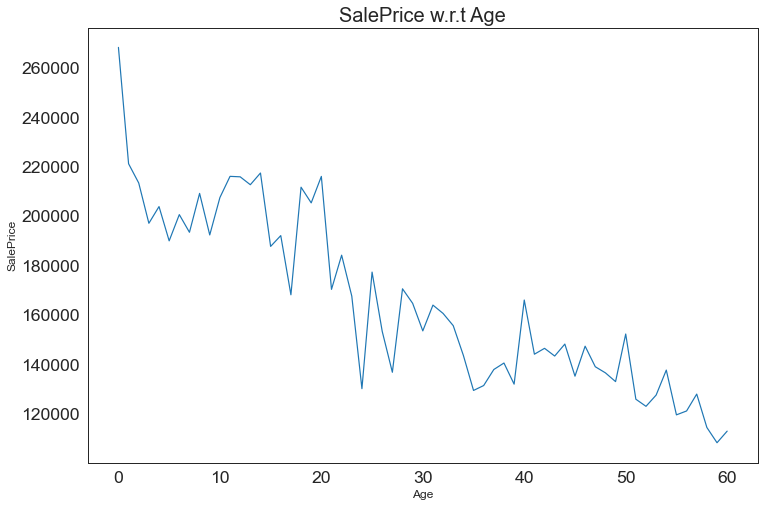

In [1665]:
plt.figure(figsize=(12,8))

plt.plot(data_featured.groupby('Age')['SalePrice'].mean().index, data_featured.groupby('Age')['SalePrice'].mean())
plt.title('SalePrice w.r.t Age', fontsize = 20)
plt.xlabel('Age', fontsize=12)
plt.ylabel('SalePrice', fontsize=12);

More recently built/remodeled houses are sold for higher prices.

In [1666]:
ym_df = data_featured[['YrSold', 'MoSold', 'SalePrice']]

In [1667]:
ym_df = ym_df.groupby(["YrSold","MoSold"],as_index=False).sum()
ym_df["Yr.Mo"] = ym_df["YrSold"].astype(str)+"."+ym_df["MoSold"].astype(str)
ym_df.set_index('Yr.Mo', inplace=True)

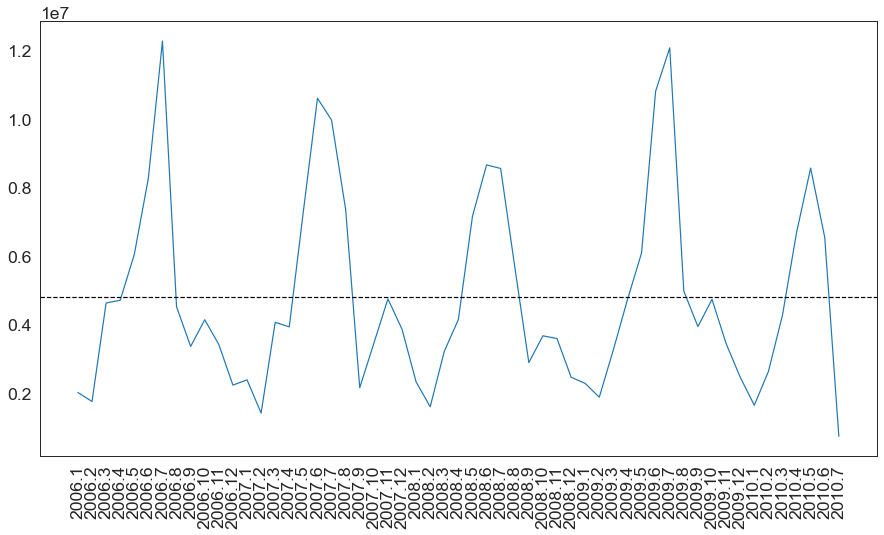

In [1668]:
plt.figure(figsize=(15,8))

plt.plot(ym_df.SalePrice)
plt.axhline(y=ym_df["SalePrice"].mean(), c='black', ls='--')
plt.xticks(rotation=90);

In [1669]:
def HighDemand(mo):
    if mo in [4, 5, 6, 7, 8]:
        return 1
    else:
        return 0
data_featured['HighDemand'] = data_featured.MoSold.apply(lambda x: HighDemand(x))
test_featured['HighDemand'] = test_featured.MoSold.apply(lambda x: HighDemand(x))
data_featured['HighDemand']

0       0
1       1
2       0
3       0
4       0
       ..
1455    1
1456    0
1457    1
1458    1
1459    1
Name: HighDemand, Length: 1460, dtype: int64

In [1670]:
data_featured.drop('MoSold', axis=1, inplace=True)
test_featured.drop('MoSold', axis=1, inplace=True)

In [1671]:
YrSold = pd.get_dummies(data_featured['YrSold'].astype('str'))
data_featured = pd.concat([data_featured, YrSold], axis=1)
data_featured.drop(columns = 'YrSold', inplace = True)

YrSold_test = pd.get_dummies(test_featured['YrSold'].astype('str'))
test_featured = pd.concat([test_featured, YrSold_test], axis=1)
test_featured.drop(columns = 'YrSold', inplace = True)

data_featured

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,Bath,Bedrooms/TotRooms,Bsmt%FinSF,Age,HighDemand,2006,2007,2008,2009,2010
0,1,60,65.0,8450,7,5,196.0,4,3,4,...,2.5,0.375000,0.824766,5,0,0,0,1,0,0
1,2,20,80.0,9600,6,8,0.0,3,3,4,...,2.0,0.500000,0.774960,31,1,0,1,0,0,0
2,3,60,68.0,11250,7,5,162.0,4,3,4,...,2.5,0.500000,0.528261,6,0,0,0,1,0,0
3,4,70,60.0,9550,7,5,0.0,3,3,3,...,1.0,0.428571,0.285714,36,0,1,0,0,0,0
4,5,60,84.0,14260,8,5,350.0,4,3,4,...,2.5,0.444444,0.572052,8,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,0.0,3,3,4,...,2.5,0.428571,0.000000,7,1,0,1,0,0,0
1456,1457,20,85.0,13175,6,6,119.0,3,3,4,...,2.0,0.428571,0.618029,22,0,0,0,0,0,1
1457,1458,70,66.0,9042,7,9,0.0,5,4,3,...,2.0,0.444444,0.238715,4,1,0,0,0,0,1
1458,1459,20,68.0,9717,5,6,0.0,3,3,3,...,1.0,0.400000,1.000000,14,1,0,0,0,0,1


In [1672]:
data_featured.select_dtypes(include=['float', 'float64', 'int64']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtExposure', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'BsmtFinType', 'SalePrice', 'BsmtBath', 'Bath', 'Bedrooms/TotRooms',
       'Bsmt%FinSF', 'Age', 'HighDemand'],
      dtype='object')

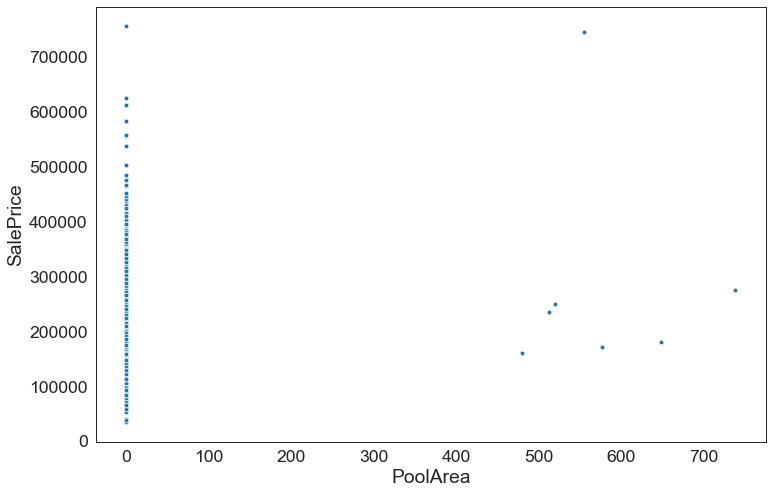

In [1673]:
plt.figure(figsize=(12,8))

sns.scatterplot(y=data_featured.SalePrice, x=data_featured.PoolArea)

In [1674]:
data_featured.PoolArea.value_counts()

0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

In [1675]:
data_featured.drop(columns='PoolArea', inplace=True)
test_featured.drop(columns='PoolArea', inplace=True)

Slope: 2.099971951707668


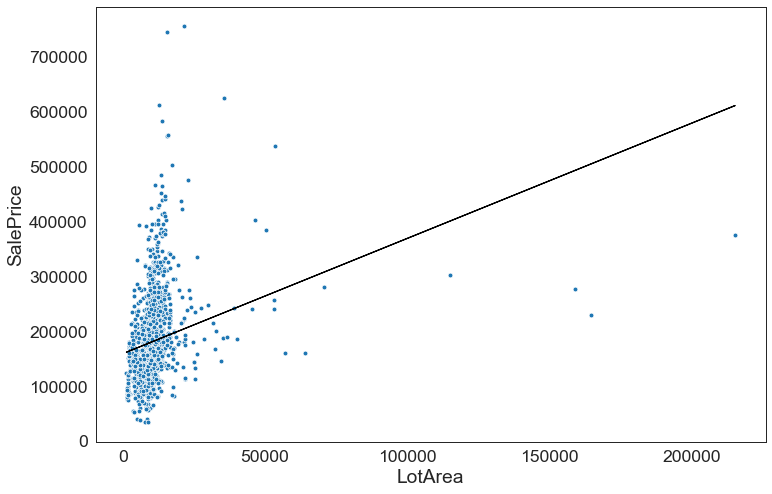

In [1676]:
plt.figure(figsize=(12,8))

sns.scatterplot(y=data_featured.SalePrice, x=data_featured.LotArea)

m,b = np.polyfit(data_featured.LotArea, data_featured.SalePrice, 1)
plt.plot(data_featured.LotArea, m*data_featured.LotArea+b, color='black')
print('Slope:', m)

There are a lot of outliers and we need to adjust the model accordingly.

Slope: 4.239512302353453


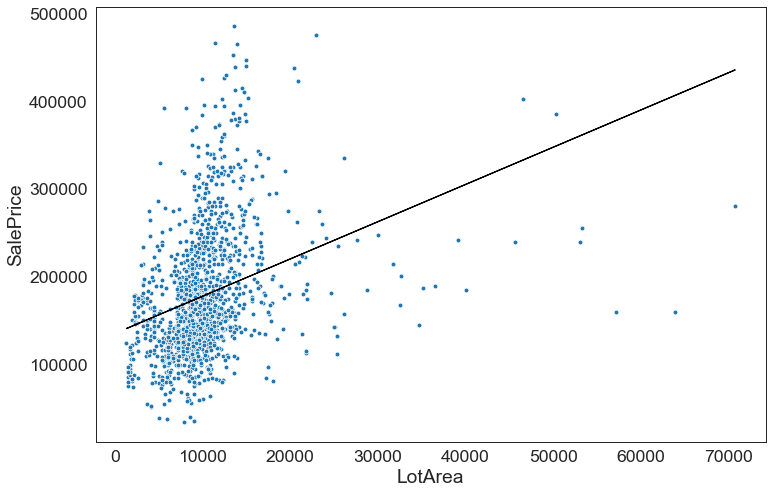

In [1677]:
plt.figure(figsize=(12,8))

sns.scatterplot(y=data_featured.SalePrice[data_featured.SalePrice<5*10**5][data_featured.LotArea<10**5], x=data_featured.LotArea[data_featured.SalePrice<5*10**5][data_featured.LotArea<10**5])

m,b = np.polyfit(data_featured.LotArea[data_featured.SalePrice<5*10**5][data_featured.LotArea<10**5], data_featured.SalePrice[data_featured.SalePrice<5*10**5][data_featured.LotArea<10**5], 1)
plt.plot(data_featured.LotArea[data_featured.SalePrice<5*10**5][data_featured.LotArea<10**5], m*data_featured.LotArea[data_featured.SalePrice<5*10**5][data_featured.LotArea<10**5]+b, color='black')
print('Slope:', m)

The slope indicated that there is a very high and positive colreation between LotArea and SalePrice of the house.

In [1678]:
data_featured.select_dtypes(include=['float', 'float64', 'int64', 'int']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtExposure', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'BsmtFinType',
       'SalePrice', 'BsmtBath', 'Bath', 'Bedrooms/TotRooms', 'Bsmt%FinSF',
       'Age', 'HighDemand'],
      dtype='object')

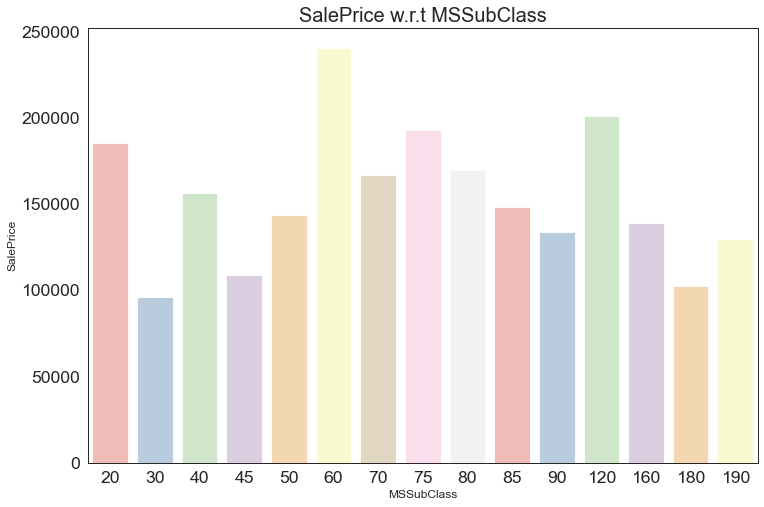

In [1679]:
plt.figure(figsize=(12,8))

sns.barplot(data_featured.groupby('MSSubClass')['SalePrice'].mean().index, data_featured.groupby('MSSubClass')['SalePrice'].mean(), palette='Pastel1')
plt.title('SalePrice w.r.t MSSubClass', fontsize = 20)
plt.xlabel('MSSubClass', fontsize=12)
plt.ylabel('SalePrice', fontsize=12);

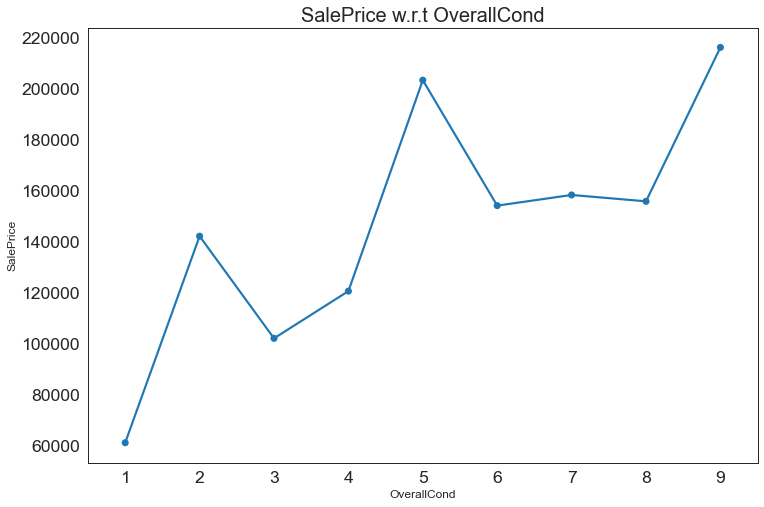

In [1680]:
plt.figure(figsize=(12,8))

sns.pointplot(data_featured.groupby('OverallCond')['SalePrice'].mean().index, data_featured.groupby('OverallCond')['SalePrice'].mean())
plt.title('SalePrice w.r.t OverallCond', fontsize = 20)
plt.xlabel('OverallCond', fontsize=12)
plt.ylabel('SalePrice', fontsize=12);

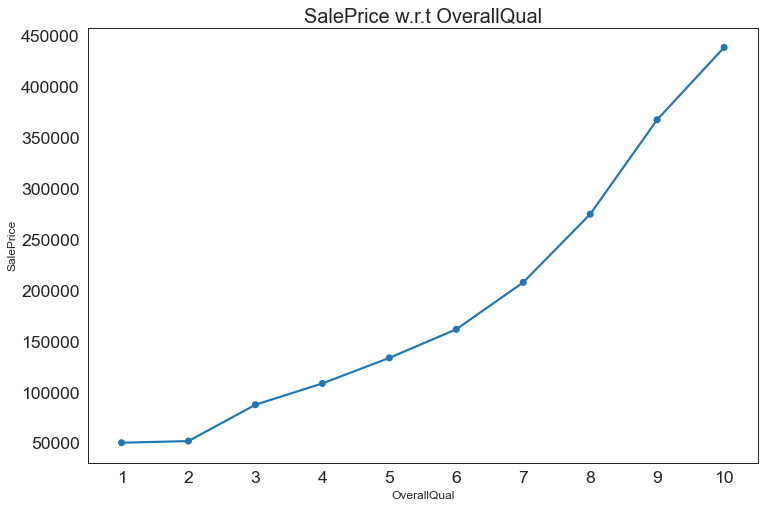

In [1681]:
plt.figure(figsize=(12,8))

sns.pointplot(data_featured.groupby('OverallQual')['SalePrice'].mean().index, data_featured.groupby('OverallQual')['SalePrice'].mean())
plt.title('SalePrice w.r.t OverallQual', fontsize = 20)
plt.xlabel('OverallQual', fontsize=12)
plt.ylabel('SalePrice', fontsize=12);

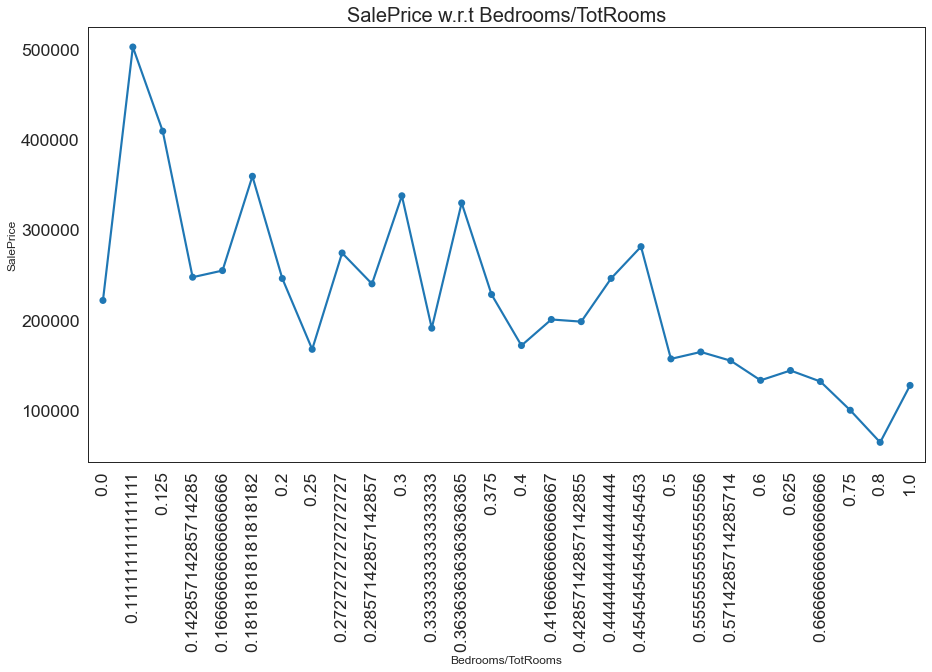

In [1682]:
plt.figure(figsize=(15,8))

sns.pointplot(data_featured.groupby('Bedrooms/TotRooms')['SalePrice'].mean().index, data_featured.groupby('Bedrooms/TotRooms')['SalePrice'].mean())
plt.title('SalePrice w.r.t Bedrooms/TotRooms', fontsize = 20)
plt.xlabel('Bedrooms/TotRooms', fontsize=12)
plt.xticks(rotation = 'vertical', rasterized=False)
plt.ylabel('SalePrice', fontsize=12);

Slope: 107.13035896582518


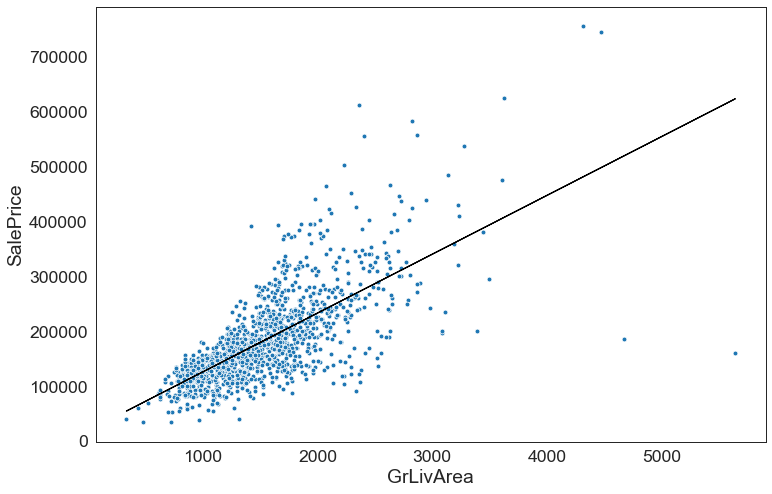

In [1683]:
plt.figure(figsize=(12,8))

sns.scatterplot(y=data_featured.SalePrice, x=data_featured.GrLivArea)

m,b = np.polyfit(data_featured.GrLivArea, data_featured.SalePrice, 1)
plt.plot(data_featured.GrLivArea, m*data_featured.GrLivArea+b, color='black')
print('Slope:', m)

In [1684]:
num_data_col = list(data_featured.select_dtypes(include=['float', 'float64', 'int64', 'int']).columns)

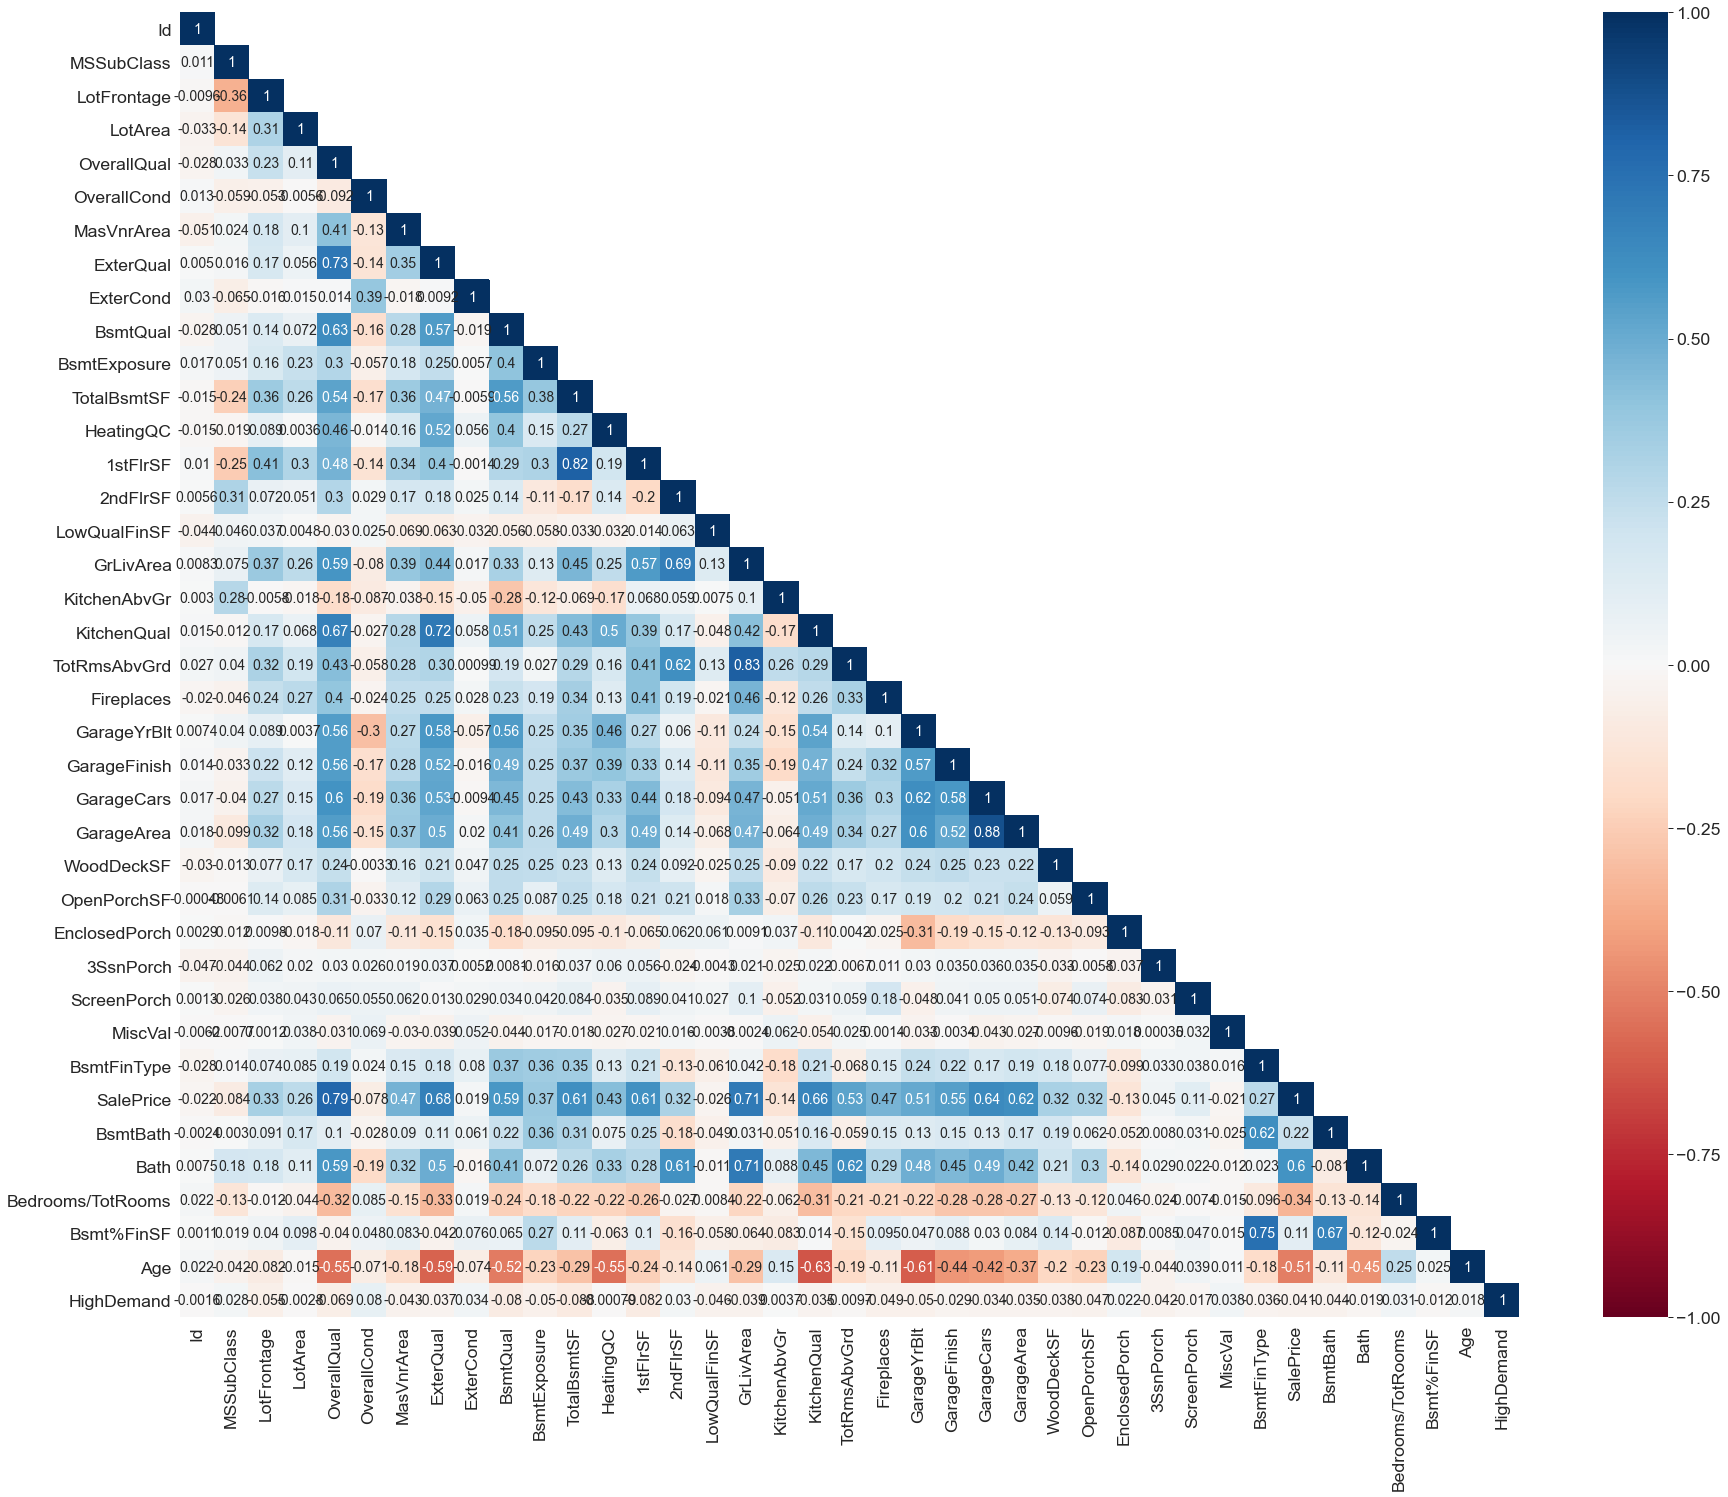

In [1685]:
plt.figure(figsize=(30,24))
sns.set_style('white')
sns.set_context("paper", font_scale=2)
corr = data_featured[num_data_col].corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corr, mask=mask, cmap='RdBu', annot=True, annot_kws={"fontsize":14}, vmin=-1);

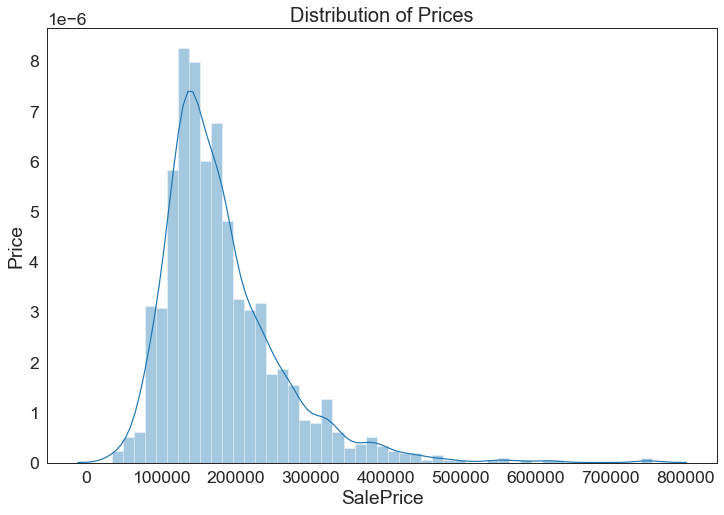

In [1686]:
plt.figure(figsize=(12,8))

sns.distplot(data_featured.SalePrice)

plt.title('Distribution of Prices', fontsize=20)
plt.ylabel('Price');

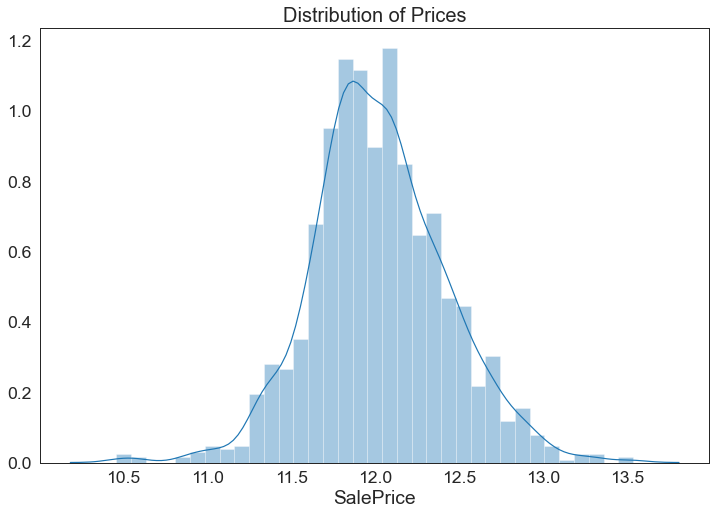

In [1687]:
plt.figure(figsize=(12,8))

sns.distplot(np.log(data_featured.SalePrice))

plt.title('Distribution of Prices', fontsize=20);

As seen, logarithmic transformation of the SalePrice column (y) is more like a normal distribution.

In [1688]:
data_featured['log_SalePrice'] = np.log(data_featured.SalePrice)
data_featured.drop(columns = ['SalePrice'], inplace=True)

In [1692]:
data_featured.isna().sum().sum()

37

In [1693]:
test_featured.isna().sum().sum()

41

In [1694]:
data_featured['Bsmt%FinSF'].fillna(-1, inplace=True)
test_featured['Bsmt%FinSF'].fillna(-1, inplace=True)

In [1695]:
data_featured.isna().sum().sum()

0

In [1696]:
test_featured.isna().sum().sum()

0

In [1697]:
data_featured.to_csv('train_featured1.csv', index=False)
test_featured.to_csv('test_featured1.csv', index=False)